# Création_des_datasets_entrainements

L'objectif de ce notebokk ets de constituer différents jeux de données en vue d'entrainer des modèles.
    - Pour la classification du caractère comestible : création de 4 jeux de données de taille (L, M, S et XS)
    - Pour la taxonomie des champignons comestible : créatoin d'un dataset ne contenant que les champignons comestibles.

In [4]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
%matplotlib inline
import plotly.express as px

In [41]:
# chargement du dataframe initial
source = r'C:\Users\renamedadmin\Documents\Formation_Datascience\Projet_Datascientest_Champignons\Dossier_technique\02_Pieces_constitutives\Dataset'
dataset = r'C:\Users\renamedadmin\Documents\Formation_Datascience\Projet_Datascientest_Champignons\Dossier_technique\02_Pieces_constitutives\Dataset\cleaned_cleaned_dataset.csv'
clean_df = pd.read_csv(dataset)

display(clean_df.head(), clean_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308960 entries, 0 to 308959
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   filename  308960 non-null  object
 1   kingdom   308960 non-null  object
 2   phylum    308960 non-null  object
 3   classes   308960 non-null  object
 4   order     308960 non-null  object
 5   family    308960 non-null  object
 6   genus     308960 non-null  object
 7   species   308960 non-null  object
 8   edible    308960 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 21.2+ MB


,filename,kingdom,phylum,classes,order,family,genus,species,edible
0,1.jpg,Fungi,Ascomycota,Sordariomycetes,Xylariales,Xylariaceae,Xylaria,Xylaria polymorpha,0
1,2.jpg,Fungi,Ascomycota,Sordariomycetes,Xylariales,Xylariaceae,Xylaria,Xylaria magnoliae,0
2,3.jpg,Fungi,Ascomycota,Sordariomycetes,Xylariales,Xylariaceae,Xylaria,Xylaria hypoxylon,0
3,4.jpg,Fungi,Ascomycota,Sordariomycetes,Xylariales,Xylariaceae,Xylaria,Xylaria hypoxylon,0
4,6.jpg,Fungi,Basidiomycota,Agaricomycetes,Agaricales,Mycenaceae,Xeromphalina,Xeromphalina campanella,0


None

### Génération de datasets réduits pour la classification binaire

In [10]:
RANDOM_STATE = 3

# simplification du dataframe initial
df = clean_df.drop(['kingdom', 'phylum', 'classes', 'order', 'family', 'genus', 'species'], axis = 1)
df.rename({'image_lien' : 'filename'}, axis = 1, inplace = True)

# définition des fractions
large = 0.5
medium = 0.2
small = 0.1
xsmall = 0.05


# constitution des datasets réduits
df_L = df.sample(frac = large, ignore_index = True, random_state = RANDOM_STATE)
df_M = df.sample(frac = medium, ignore_index = True, random_state = RANDOM_STATE)
df_S = df.sample(frac = small, ignore_index = True, random_state = RANDOM_STATE)
df_XS = df.sample(frac = xsmall, ignore_index = True, random_state = RANDOM_STATE)


#### création d'un graphique représentant les différents datasets

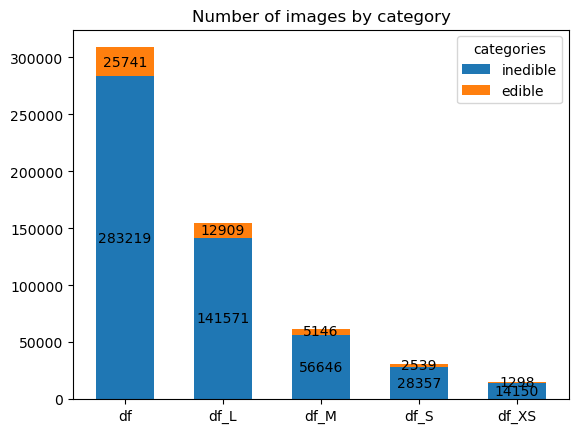

In [12]:
# génération des données du graph
inedible = []
edible = []

dataframes = [df, df_L, df_M, df_S, df_XS]
for dataframe in dataframes:
    count_inedible = dataframe['edible'].value_counts()[0]
    inedible.append(count_inedible)
    count_edible = dataframe['edible'].value_counts()[1]
    edible.append(count_edible)   

data = ['df', 'df_L', 'df_M', 'df_S', 'df_XS']
edibility = {'inedible': inedible, 'edible' : edible}

colonnes = ['df', 'df_L', 'df_M', 'df_S', 'df_XS']
sex_counts = {
    'inedible': inedible,
    'edible': edible
}

width = 0.6
fig, ax = plt.subplots()
bottom = np.zeros(5)
for i, j in edibility.items():
    p = ax.bar(data, j, width, label=i, bottom=bottom)
    bottom += j
    ax.bar_label(p, label_type='center')
ax.set_title('Number of images by category')
ax.legend(title = 'categories')

plt.show()

In [90]:
# sauvegarde des dataframes générés

df_L.to_csv(f"{source}/df_L.csv", index = False)
df_M.to_csv(f"{source}/df_M.csv", index = False)
df_S.to_csv(f"{source}/df_S.csv", index = False)
df_XS.to_csv(f"{source}/df_XS.csv", index = False)

#### Affichage d'une figure représentant la repartition de la cible de notre étude dans le jeu de données final

In [55]:
# attention, cette cellule est utilise de nombreuses ressources pour affichage !

#dataset = clean_df

#dataset['edible'].replace(1, 'edible', inplace=True)
#dataset['edible'].replace(0, 'inedible', inplace=True)


#fig = px.sunburst(dataset.assign(hole=' '),
#                  path=['hole','edible', 'kingdom','phylum','classes', 'order', 'family'],
#                 width=750, height=750)

#fig.show()

### Création du dataset pour la taxonomie des champignons comestibles 

In [48]:
# création du dataframe d'images de champignons comestibles
inedible = clean_df[clean_df['edible'] == 0].index
edible_df = clean_df.drop(inedible)
edible_df.drop(['edible'], axis = 1, inplace = True)

# sauvegarde du dataframe généré
edible_df.to_csv(f"{source}/df_edible.csv", index = False)

#### Affichage d'une figure représentant la repartition de la cible de notre étude dans le jeu de données final de champignons comestibles

In [51]:
# attention, cette cellule est utilise de nombreuses ressources pour affichage !

#dataset_edible = edible_df

#fig = px.sunburst(dataset_edible.assign(hole=' '),
#                  path=['hole','order', 'family', 'genus', 'species' ],
#                 width=750, height=750)

#fig.show()